In [1]:
# -*- coding: utf-8 -*-
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 20)


import numpy as np

from scipy import stats

from bokeh.io import show, output_file
from bokeh.plotting import figure

 
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20b
from bokeh.palettes import Set3
from bokeh.models import LabelSet
from bokeh.models import ColumnDataSource

import math

output_notebook()

Loading BokehJS ...

In [2]:
spreadsheet = client.open_by_key("190hg-U4hPlCfnY6wWRstiZcfdOvyW6-_FDn4hnLs8YM")
sheetFinalResults = spreadsheet.get_worksheet(3)

In [3]:
#list_of_hashesA = sheetA1.get_all_records()
#print(list_of_hashes)

data = pd.DataFrame(sheetFinalResults.get_all_records())

print("Number of papers resulting the mapping: ", len(data))

Number of papers resulting the mapping:  23


In [4]:
display(data.head())

,Acronym,Aditional Information Sources,Call,Call year,Countries,Description,Domain,Domain details,End date,European funding (€),...,Programme,Reference,Stakeholders,Start date,Title,Total budget (€),"Type of ecosystem (mobile, web, sensors, ...)",Type of institutions,URL,Web
0,BigDataEurope,https://www.big-data-europe.eu/pilot-health/,H2020-ICT-2014-1,2014,"Germany,Greece,Belgium,Austria,Germany,France,...",An ecosystem of specifications and reference i...,Big data,Health,2017-12-31,"4.984.238,75",...,H2020,644564,"Software providers, Software developers, Scien...",2015-01-01,"Integrating Big Data, Software and Communities...","4.984.238,75",web+cloud,"R&D,R&D,Business,Business,R&D,Consortium,R&D,R...",https://cordis.europa.eu/project/rcn/194216_en...,https://www.big-data-europe.eu/
1,UNCAP,,H2020-PHC-2014-single-stage,2014,"Italy,UK,Slovenia,Romania,Greece,Germany,Italy...",Interoperable platform based on open industria...,"Independent living, Healthcare",,2017-12-31,3.086.254,...,H2020,643555,"Older persons, Formal carers, Informal carers,...",2015-01-01,Ubiquitous iNteroperable Care for Ageing People,"3.820.763,91",mobile+sensors,"Business,Business,R&D,Business,Business,Busine...",https://cordis.europa.eu/project/rcn/196618_en...,http://www.uncap.eu/
2,CIMPLEX,https://www.cimplex-project.eu/research-outlin...,H2020-FETPROACT-2014,2014,"Germany,Switzerland,Germany,UK,Hungary,Itally,...",ICT platform to predict and influence disease ...,Diseases spread,,2017-12-31,3.450.625,...,H2020,641191,"Scientists, Citizens, Policy makers, Software ...",2015-01-01,"Bringing CItizens, Models and Data together in...",4.206.875,web+mobile,"R&D,R&D,R&D,R&D,R&D,R&D,R&D,R&D",https://cordis.europa.eu/project/rcn/193790_en...,https://www.cimplex-project.eu/
3,DECI,,H2020-PHC-2014-single-stage,2014,"Italy,Italy,Italy,Sweden,Sweden,Spain,Israel,N...",Defining an innovative business model to suppl...,"Independent living, Quality of life, Healthcare",,2018-05-31,2.921.577,...,H2020,643588,"Older persons, PwD, Patients, Formal carers, R...",2015-06-01,Digital Environment for Cognitive Inclusion,"3.184.975,71",web+mobile,"R&D,Business,R&D,R&D,Public-body,Public-body,P...",https://cordis.europa.eu/project/rcn/197186_en...,http://deci-europe.eu/deciproject/deci/goals/
4,METASPACE,https://metaspace2020.eu/,H2020-PHC-2014-two-stage,2014,"Germany,Belgium,UK,USA,France,Germany,Germany,...",An open online platform providing a set of too...,Bioinformatics,Metabolomics,2018-06-30,2.998.944,...,H2020,634402,"Scientists, Research centers, Universities, In...",2015-07-01,Bioinformatics for spatial metabolomics,2.998.944,web,"R&D,R&D,R&D,R&D,R&D,Business,Business,Business",https://cordis.europa.eu/project/rcn/193283_en...,http://project.metaspace2020.eu/


In [5]:
domains = data["Domain"].values
domains_list = []
for domain in domains:
    [domains_list.append(x.strip()) for x in domain.split(',')]
    
domains_list = [x for x in domains_list if x != '']
display(domains_list)

dfDomains = pd.DataFrame(domains_list)

['Big data',
 'Independent living',
 'Healthcare',
 'Diseases spread',
 'Independent living',
 'Quality of life',
 'Healthcare',
 'Bioinformatics',
 'Biomedical engineering',
 'Healthcare',
 'Independent living',
 'Well-ageing',
 'Independent living',
 'Independent living',
 'Quality of life',
 'Well-ageing',
 'Independent living',
 'Independent living',
 'Healthcare',
 'Quality of life',
 'Healthcare',
 'Assistive services',
 'Quality of life',
 'Healthcare',
 'Assistive services',
 'Healthcare',
 'Healthcare',
 'Home rehabilitation',
 'Rural areas',
 'Healthcare',
 'Wellbeing',
 'Healthcare',
 'Healthcare',
 'Rehabilitation',
 'Independent living',
 'Assistive services']

In [6]:
display(dfDomains)

,0
0,Big data
1,Independent living
2,Healthcare
3,Diseases spread
4,Independent living
5,Quality of life
6,Healthcare
7,Bioinformatics
8,Biomedical engineering
9,Healthcare


In [7]:
dfDomains.columns = ['Term']
resultsDomains = pd.DataFrame(dfDomains['Term'].value_counts())
display(resultsDomains)

,Term
Healthcare,11
Independent living,8
Quality of life,4
Assistive services,3
Well-ageing,2
Biomedical engineering,1
Big data,1
Rehabilitation,1
Home rehabilitation,1
Diseases spread,1


In [8]:
resultsDomains.reset_index(level=0, inplace=True)
resultsDomains.columns = ['Term', 'Count']

resultsDomains.sort_values(['Term', 'Count'], ascending=[True, False], inplace=True)
display(resultsDomains)

,Term,Count
3,Assistive services,3
6,Big data,1
12,Bioinformatics,1
5,Biomedical engineering,1
9,Diseases spread,1
0,Healthcare,11
8,Home rehabilitation,1
1,Independent living,8
2,Quality of life,4
7,Rehabilitation,1


In [9]:
# output_file('vbar.html')

p = figure(x_range=resultsDomains['Term'].tolist(), toolbar_location=None, title="Domain Counts")
p.vbar(x=resultsDomains['Term'].tolist(), top=resultsDomains['Count'].tolist(), width=0.6)
p.xgrid.grid_line_color = None
p.xaxis.major_label_text_font_size="12pt"
p.yaxis.major_label_text_font_size="12pt"
p.y_range.start = 0
p.y_range.end = 12
p.xaxis.major_label_orientation = math.pi/2

show(p)

In [10]:
institutions = data["Type of institutions"].values
institutions_list = []
for institution in institutions:
    [institutions_list.append(x.strip()) for x in institution.split(',')]
    
institutions_list = [x for x in institutions_list if x != '']
# display(authors_list)

dfTypeIns = pd.DataFrame(institutions_list)
dfTypeIns.columns = ['Type']
display(dfTypeIns)

,Type
0,R&D
1,R&D
2,Business
3,Business
4,R&D
5,Consortium
6,R&D
7,R&D
8,Public-body
9,R&D


In [11]:
resultsTypeIns = pd.DataFrame(dfTypeIns['Type'].value_counts())
# display(resultsAuthors)
resultsTypeIns.reset_index(level=0, inplace=True)
resultsTypeIns.columns = ['Type', 'Count']

display(resultsTypeIns)

,Type,Count
0,R&D,98
1,SME,28
2,Public-body,24
3,Business,21
4,End-user,17
5,Multi-stakeholder,4
6,Consortium,3


In [12]:
p = figure(y_range=resultsTypeIns['Type'].tolist(), toolbar_location=None, title="Type of institutions")
p.hbar(y=resultsTypeIns['Type'].tolist(), right=resultsTypeIns['Count'].tolist(), height=0.6)
p.xaxis.major_label_text_font_size="12pt"
p.yaxis.major_label_text_font_size="12pt"
p.ygrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 110
show(p)

In [13]:
pieInst = pd.DataFrame(resultsTypeIns['Count'].tolist(), columns=["Type of institutions"])
pieInst.plot.pie(subplots=True, labels=resultsTypeIns['Type'].tolist(), autopct='%.2f%%', fontsize=12, figsize=(10, 10), colormap="Set3")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e543668>],
      dtype=object)

In [14]:
stakeholders = data["Stakeholders"].values
stakeholders_list = []
for stakeholder in stakeholders:
    [stakeholders_list.append(x.strip()) for x in stakeholder.split(',')]
    
stakeholders_list = [x for x in stakeholders_list if x != '']
# display(authors_list)

dfStakeholder = pd.DataFrame(stakeholders_list)
dfStakeholder.columns = ['Type']
display(dfStakeholder)

,Type
0,Software providers
1,Software developers
2,Scientists
3,Older persons
4,Formal carers
5,Informal carers
6,Healthcare centers
7,Software providers
8,Health device companies
9,Scientists


In [15]:
resultsStakeholders = pd.DataFrame(dfStakeholder['Type'].value_counts())

resultsStakeholders.reset_index(level=0, inplace=True)
resultsStakeholders.columns = ['Type', 'Count']
resultsStakeholders.sort_values(['Type', 'Count'], ascending=[False, True], inplace=True)
display(resultsStakeholders)

,Type,Count
14,Universities,2
16,Students,1
2,Software providers,7
24,Software developers,1
7,Service providers,5
4,Scientists,6
19,SMEs,1
23,Research centers,1
15,Relatives,2
13,PwD,3


In [16]:
p = figure(y_range=resultsStakeholders['Type'].tolist(), toolbar_location=None, title="Stakeholders")
p.hbar(y=resultsStakeholders['Type'].tolist(), right=resultsStakeholders['Count'].tolist(), height=0.6, fill_color="#009cdd")
p.ygrid.grid_line_color = None
p.xaxis.major_label_text_font_size="12pt"
p.yaxis.major_label_text_font_size="12pt"
p.x_range.start = 0
p.x_range.end = 11

show(p)

In [17]:
programmes = data["Programme"].values
programmes_list = []
for programme in programmes:
    [programmes_list.append(x.strip()) for x in programme.split(',')]
    
programmes_list = [x for x in programmes_list if x != '']

dfProgrammes = pd.DataFrame(programmes_list)
dfProgrammes.columns = ['Name']
display(dfProgrammes)

,Name
0,H2020
1,H2020
2,H2020
3,H2020
4,H2020
5,H2020
6,H2020
7,AAL PROGRAMME
8,AAL PROGRAMME
9,AAL PROGRAMME


In [18]:
resultsProgrammes = pd.DataFrame(dfProgrammes['Name'].value_counts())
# display(resultsProgrammes)
resultsProgrammes.reset_index(level=0, inplace=True)
resultsProgrammes.columns = ['Name', 'Count']

display(resultsProgrammes)

,Name,Count
0,AAL PROGRAMME,8
1,H2020,7
2,2014 - 2020 INTERREG V-A France - Belgium - Th...,1
3,2014 - 2020 Interreg IPA CBC Croatia-Serbia,1
4,2014 - 2020 INTERREG V-A Italy - Austria,1
5,2014 - 2020 INTERREG VB South West Europe,1
6,2014 - 2020 INTERREG V-A Italy - Slovenia,1
7,2014 - 2020 Interreg Europe,1
8,2014 - 2020 INTERREG VB Northern Periphery and...,1
9,2014 - 2020 INTERREG V-A Greece - Bulgaria,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ecb78d0>],
      dtype=object)

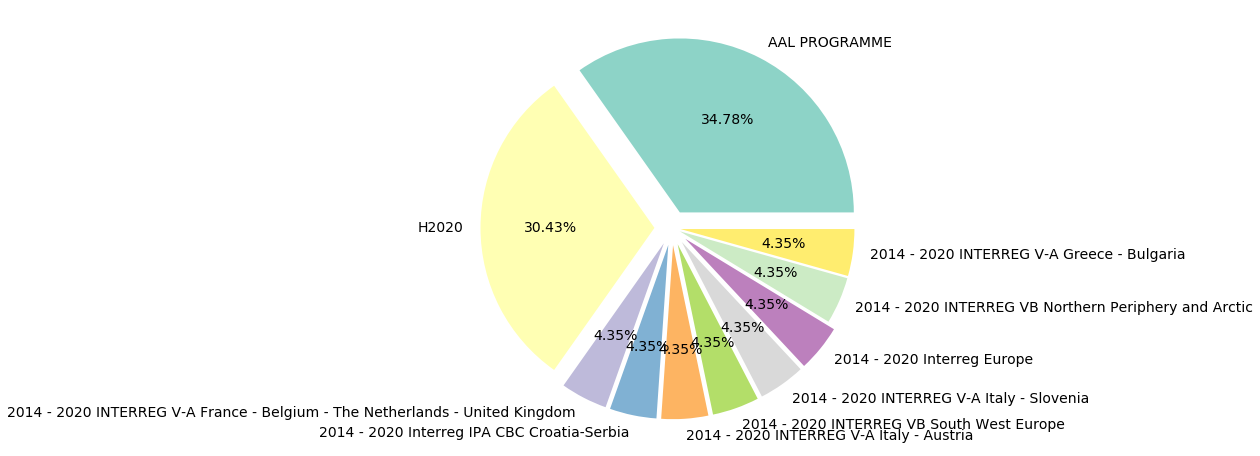

In [19]:
pieProgramme = pd.DataFrame(resultsProgrammes['Count'].tolist(), columns=[""])
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05)
pieProgramme.plot.pie(subplots=True, labels=resultsProgrammes['Name'].tolist(), explode=explode, legend=False, colormap="Set3", autopct='%.2f%%', fontsize=14, figsize=(8, 8))

In [20]:
resultsYears = pd.DataFrame(data['Call year'].value_counts())
resultsYears.reset_index(level=0, inplace=True)
resultsYears.columns = ['Year', 'Count']
resultsYears.sort_values(['Year', 'Count'], ascending=[False, False], inplace=True)
display(resultsYears)

,Year,Count
3,2017,1
1,2016,8
2,2015,5
0,2014,9


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ed47da0>],
      dtype=object)

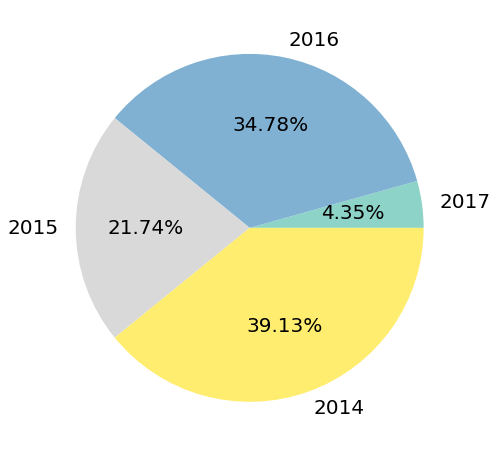

In [21]:
pieCYear = pd.DataFrame(resultsYears['Count'].tolist(), columns=[""])
pieCYear.plot.pie(subplots=True, labels=resultsYears['Year'].tolist(), legend=False, colormap="Set3", autopct='%.2f%%', fontsize=20, figsize=(8, 8))

In [22]:
countries = data["Countries"].values
countries_list = []
for country in countries:
    [countries_list.append(x.strip()) for x in country.split(',')]
    
countries_list = [x for x in countries_list if x != '']

dfCountries = pd.DataFrame(countries_list)
dfCountries.columns = ['Country']
display(dfCountries)

,Country
0,Germany
1,Greece
2,Belgium
3,Austria
4,Germany
5,France
6,UK
7,Greece
8,Italy
9,Greece


In [23]:
resultsCountries = pd.DataFrame(dfCountries['Country'].value_counts())
# display(resultsProgrammes)
resultsCountries.reset_index(level=0, inplace=True)
resultsCountries.columns = ['Country', 'Count']
resultsCountries.sort_values(['Country', 'Count'], ascending=[False, True], inplace=True)

display(resultsCountries)

,Country,Count
25,Uganda,1
29,USA,1
4,UK,12
9,Switzerland,8
22,Sweeden,2
8,Sweden,9
5,Spain,12
10,Slovenia,8
23,Serbia,2
6,Romania,12


In [24]:
factors = resultsCountries['Country'].tolist()
x =  resultsCountries['Count'].tolist()

dot = figure(title="Countries", tools="", toolbar_location=None,
            y_range=factors, x_range=[0,34])

dot.segment(0, factors, x, factors, line_width=2, line_color="#006aaf", )
dot.circle(x, factors, size=12, fill_color="#009cdd", line_color="#006aaf", line_width=2)
dot.xaxis.major_label_text_font_size="12pt"
dot.yaxis.major_label_text_font_size="12pt"
show(dot)

In [25]:
ecosystems = data["Type of ecosystem (mobile, web, sensors, ...)"].values
ecosystems_list = []
for ecosystem in ecosystems:
    [ecosystems_list.append(x.strip()) for x in ecosystem.split('+')]
    
ecosystems_list = [x for x in ecosystems_list if x != '']
# display(authors_list)

dfTypeEco = pd.DataFrame(ecosystems_list)
dfTypeEco.columns = ['Type']
display(dfTypeEco)

,Type
0,web
1,cloud
2,mobile
3,sensors
4,web
5,mobile
6,web
7,mobile
8,web
9,web


In [26]:
resultsEcosystems = pd.DataFrame(dfTypeEco['Type'].value_counts())
resultsEcosystems.reset_index(level=0, inplace=True)
resultsEcosystems.columns = ['Type', 'Count']
resultsEcosystems.sort_values(['Type', 'Count'], ascending=[False, True], inplace=True)

display(resultsEcosystems)

,Type,Count
0,web,13
1,sensors,11
6,robots,1
2,mobile,9
4,hardware,2
3,cloud,3
5,Smart -TV based,1


In [27]:
types = resultsEcosystems['Type'].tolist()
counts = resultsEcosystems['Count'].tolist()

source = ColumnDataSource(data=dict(types=types, counts=counts, color=Set3[len(counts)]))

p = figure(x_range=types, y_range=(0,14), plot_height=400, title="Types of ecosystems",
           toolbar_location=None, tools="")

p.vbar(x='types', top='counts', width=0.9, color='color', legend="types", source=source)

p.xgrid.grid_line_color = None
p.yaxis.major_label_text_font_size="12pt"
p.xaxis.visible = False
p.legend.orientation = "vertical"
p.legend.location = "top_right"

show(p)